# TP2: Architectural Analysis

## 

## Load an MTG file

In [2]:
from path import Path
# load MTG files
data = Path('data')

breaburn, fuji1, fuji2= data.glob('apple*.mtg')

In [6]:
!cat $breaburn


#Pommier Melgueil Braeburn 64				
CODE :	FORM-A			
CLASSES:				
SYMBOL	SCALE	DECOMPOSITION	INDEXATION	DEFINITION
$ 	0	FREE	FREE	IMPLICIT
P	1	FREE	FREE	EXPLICIT
R	2	PURELINEAR	FREE	IMPLICIT
M	2	PURELINEAR	FREE	IMPLICIT
S	2	PURELINEAR	FREE	IMPLICIT
I	3	FREE	FREE	EXPLICIT
U 	3	FREE	FREE	EXPLICIT
W	3	FREE	FREE	EXPLICIT
D 	3	FREE	FREE	EXPLICIT
E	4	FREE	FREE	EXPLICIT
F	4	FREE	FREE	EXPLICIT

DESCRIPTION :			
LEFT	RIGHT	RELTYPE	MAX
R	R,M,S	+	?
R	R,M,S	<	1
M	R,M,S	+	?
M	M,S	<	1
S	R,M,S	+	?
S	S	<	1
U	U,W,I,D	+	?
U	U,W,I,D	<	1
W	U,W,I,D	+	?
W	U,W,I,D	<	1
I	U,W,I,D	+	?
D	U,W,I,D	<	1
D	D, W	+	?
E	E,F	+	?
E	E,F	<	1


FEATURES:			
NAME	TYPE		
TopDia	REAL		
XX	REAL		
YY	REAL		
ZZ	REAL		
d98	REAL		
Nli98	INT		
x98	REAL		
y98	REAL		
z98	REAL		
d97	REAL		
rem	ALPHA		
Nli97	INT
x97	REAL
y97	REAL
z97	REAL
Nfruit	REAL
MS	REAL
fermete	REAL
IR	REAL
diam	REAL
hauteur	REAL
color	REAL
codeami	REAL
Poids	REAL
Densite	REAL
Hertz	REAL
Elson	REAL
lin	INT																																		

MTG:																							

			+S1/I97/E1+D97/E1										1756						500	-5.3	-83.76	-68.27													2880
			^<I98/E1+D98/E1										1757	139.72	-62.4	-63.08																			2881
			^<I99/E1+D99/E1						84.72	-62.81	-67.5																								2882
		^<E16<<E18											1758																						2883
			+S1/I97/E1+D97/E1										1759						501	-7.51	-88.52	-64.79													2884
			^<I98/E1+W98/E1<<E8										1760	134.92	-65.75	-59.93																			2885
			^<I99/E1																																2886
				+S1/D99/E1					80.73	-67.76	-64.55																								2887
			^<E2																																2888
				+D99/E1					79.58	-67.56	-65.47																								2889
		^<E19											1761					MORT																	2890
		^<E20										8.3	1762	137.8	-62.98	-57.44	75		502	-5.82	-87.56	-63.76													2891
			+S1/I97/E1										1763																						2892
				+S1/D97/E1									1764						503	-5.59	-89.82	-63.01													2893
				^<I98/E1+D98/E1									1765	136.03	-64.88	-55.64									

		^<I98/E1											3650	204.14	21.97	-132.81																			5898
			+D98/E1										3651	204.57	22.26	-133.07																			5899
		^<F243											3652																						5900
	^<E14												3653																						5901
		+S1/I97/E1+D97/E1											3654						1057	57.77	20.88	-132.89													5902
		^<I98/E1											3655	199.34	25.89	-129.81																			5903
			+D98/E1										3656	199.27	26.54	-130.66																			5904
			^<I99/E1						146.9	37.32	-132.78																								5905
				+S1/D99/E1					146.41	37.74	-132.64																								5906
			^<E2																																5907
				+S1/D99/E1					146.08	36.92	-136.33																								5908
			^<F221																																5909
		^<F244											3657																						5910
	^<E15							101	142.22	38.86	-133.34	8.5	3658	202.82	25.72	-130.25			1058	56.5	22.04	-130.95													5911
		+S1/I97/E1+D97/E1											3659				81		1059	54.67	23.17	-130.24													5912
		^<I

## Load MTGs in memory

- Vertex identifier: vid
- MTG data structure : g


In [12]:
from openalea.mtg import *
g = MTG(breaburn)
print g

MTG : nb_vertices=22299, nb_scales=5


In [18]:
# Print the number of scales
nb_scales = g.nb_scales()

# Print the vertices at different scales
for scale in range(1, nb_scales):
    print 'Nb vertices at scale ', scale, ': ', g.nb_vertices(scale=scale)
    print 'Classes : ', list(set(g.Class(vid) for vid in g.vertices(scale=scale)))
    print

Nb vertices at scale  1 :  1
Classes :  ['P']

Nb vertices at scale  2 :  2361
Classes :  ['S', 'R', 'M']

Nb vertices at scale  3 :  6580
Classes :  ['I', 'U', 'D', 'W']

Nb vertices at scale  4 :  13356
Classes :  ['E', 'F']



# Classes represent modularities
## Scale 1: P = Plant

## scale 2: Axes 
- S: Short 
- R : Long  
- M : Medium 

## scale 3 : Growth Unit
- I : Inflorescence
- U : Long GU
- D : Short GU
- W : Medium GU

## Scale 4: phytomer
- E: vegetative
- F: fruit

Fruit are not a modularity but we can encore specific attributes

In [30]:
# Select all the vertices of each classes

classes = list(set(g.Class(vid) for vid in g.vertices() if g.Class(vid)))
print classes

def vertices(g, class_name='P'):
    return [vid for vid in g.vertices() if g.Class(vid)==class_name]

vids_E = vertices(g, 'E')
print 'Nb E', len(vids_E)

# Get the properties of one E vertex




['E', 'D', 'F', 'I', 'M', 'P', 'S', 'R', 'U', 'W']
Nb E 12745


4

# Get properties on the MTG and on each vertices

In [42]:
# Get one vertex
vid = vids_E[0]

# Properties on the MTG: this exclude all the topological properties
print g.property_names()

# Retrieve one property for the MTG (dict)
height = g.property('hauteur')
print height

# There are several methods to get all the properties of a given vertex (eg vid)
print g[vid]
node = g.node(vid)
print node.properties()

# get the label
print g[vid]['label']
print node.label
print node.index()

['y97', 'x97', 'x98', 'y98', 'Hertz', 'YY', 'edge_type', 'Nfruit', 'Densite', '_line', 'index', 'diam', 'Nli98', 'lin', 'label', 'color', 'rem', 'TopDia', 'hauteur', 'd97', 'd98', 'Elson', 'IR', 'XX', 'ZZ', 'Poids', 'fermete', 'codeami', 'z97', 'MS', 'Nli97', 'z98']
{11265: 77.04, 1411: 68.3, 21767: 61.4, 16300: 72.4, 5635: 73.9, 13422: 71.7, 5399: 73.3, 18095: 70.9, 13725: 73.1, 17823: 69.1, 9121: 68.4, 4004: 68.9, 4389: 78.1, 2481: 75.3, 11560: 66.0, 5036: 68.7, 20269: 63.5, 10031: 79.3, 5681: 67.2, 19892: 73.6, 20021: 71.8, 13110: 78.1, 17417: 64.2, 10809: 72.2, 1723: 68.4, 4415: 73.0, 20534: 64.11, 586: 70.6, 17611: 61.1, 3533: 74.1, 5072: 69.7, 21205: 61.1, 15446: 72.1, 10074: 72.1, 3805: 78.1, 14686: 64.8, 5344: 63.8, 21731: 74.74, 12905: 73.8, 11630: 61.1, 8305: 61.05, 21621: 64.5, 21117: 76.01, 18581: 64.4}
{'vid': 4, 'y97': -1.56, 'd98': 56.4, 'parent': None, 'x97': -20.27, 'x98': 129.52, 'd97': 552.0, 'y98': 11.32, 'YY': 9.62, 'XX': 71.03, 'ZZ': -12.55, '_line': 69, 'index': 

## Compute at GU scale the number of growth unit by type and year

- the class of a vertex : g.Class(v)
- the year is the encoded as the index: $label = class + index$
year = g.index(v) or node.index()

[94, 95, 96, 97, 98, 99]
set(['I', 'U', 'D', 'W'])
{'I': {96: 151, 97: 598, 98: 1006, 99: 1208, 94: 0, 95: 12}, 'U': {96: 40, 97: 37, 98: 8, 99: 1, 94: 1, 95: 10}, 'D': {96: 108, 97: 551, 98: 891, 99: 1502, 94: 0, 95: 10}, 'W': {96: 46, 97: 117, 98: 200, 99: 83, 94: 0, 95: 0}}


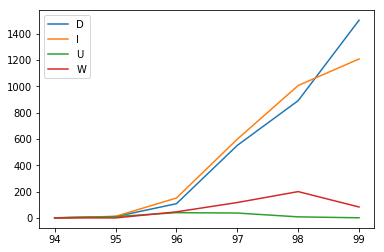

In [94]:

# Extract the years
years = set(int(g.index(vid)) for vid in g.vertices(scale=3))
print sorted(years)

classes = set(g.Class(vid) for vid in g.vertices(scale=3))
print classes

d = {}

for c in classes:
    d[c] = {}
    for y in years:
        d[c][y] = 0
        
for vid in g.vertices(scale=3):
    _class = g.Class(vid)
    _year = int(g.index(vid))
    d[_class][_year] += 1
    
print d

df = pd.DataFrame.from_dict(d)
df.plot()

In [92]:
# Export to a pandas dataframe

# We need a dict with columns class, year and number

dd = datadict = {'class':[], 'year': [], 'number':[]}
for k in d:
    for y in d[k]:
        dd['class'].append(k)
        dd['year'].append(y)
        dd['number'].append(d[k][y])
        

import pandas as pd
df = pd.DataFrame(data=dd, index=None, columns=['class', 'year', 'number'])
df.sort_values(['class', 'year'])
df.to_csv('result.csv', index=None)

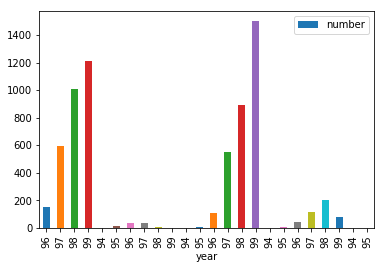

In [82]:
%matplotlib inline
df.plot?
df.plot(x='year', y='number', by='class', kind='bar')

In [89]:
df.columns

Index([u'class', u'year', u'number'], dtype='object')

## Extract for each Growth Unit the number of metamer (components at scale 4)

## Extract the number of ramification from each growth unit

## For each vertex at scale Metamer (scale =4), population of ramifications and position

- vertex of the complex
- Class of complex
- year of complex
- position / rank of each metamer
- if no ramification, put B (blind) else the class of the complex of its child


## For each year, and each type  give the number of successor of each type

